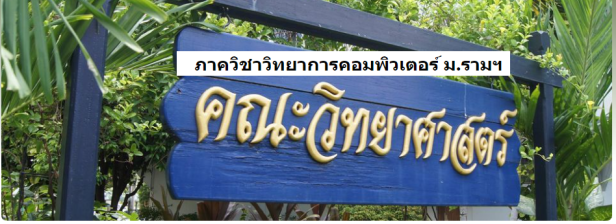

## Edge detection
### 1.  Introduction 

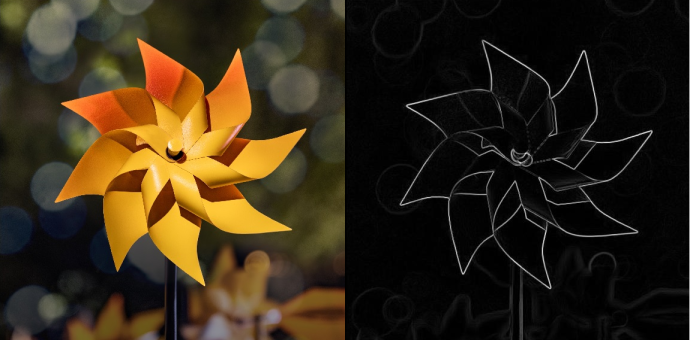

**Edge detection** is a fundamental technique in image processing and computer vision, used to identify points in an image where the brightness of colors changes distinctly. It's primarily used to extract structural information from images and is a critical tool in many applications like object recognition, image segmentation, and feature detection. Here's a basic tutorial covering the key concepts and methods for edge detection:
### 2. Understanding Edge Detection
- **Definition:** An edge in an image is a significant local change in the image intensity, usually associated with a discontinuity in either the image intensity or the first derivative of the image intensity.
- **Importance:** Detecting edges is crucial for image analysis, especially in applications involving shape detection.
### 3. Basic Concepts
- **Gradient:** A measure of change in brightness over a series of pixels. It's a vector containing the direction and magnitude of the most significant change.

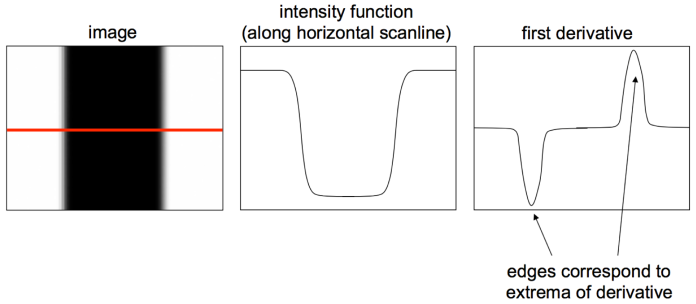

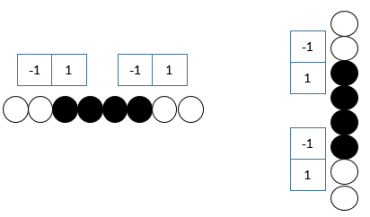    

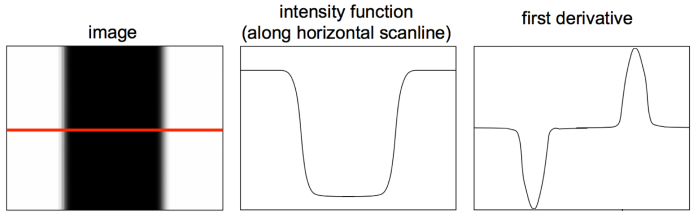

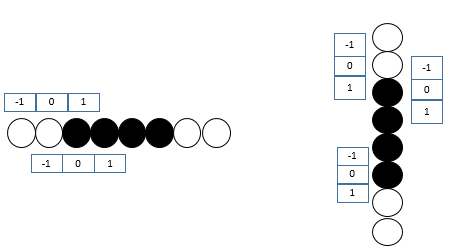

- **Prewitt Operator:** A popular method to approximate the gradient of the image intensity function.

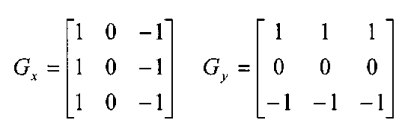    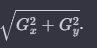

- **Sobel Operator:** A popular method to approximate the gradient of the image intensity function.

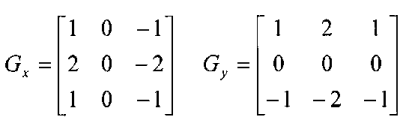


- **Canny Edge Detector:** A multi-stage algorithm that detects a wide range of edges in images.

### Import Module

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

### Show Image Module

In [ ]:
def plt_show(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
def cv_show(img):
    cv2.imshow('Mean Filtered Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

#### Prewitt Operator
- **Principle:** Uses convolution with Sobel kernels to compute the gradient magnitude at each pixel.
- **Implementation:** Convolve the image with a pair of 3x3 kernels (one estimating the gradient in the x-direction and the other in the y-direction). The gradient magnitude is computed using the formula:

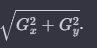


In [ ]:
def prewitt_operator_meth(img):
    
    mask_gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype='float')
    mask_gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype='float')
    gx = cv2.filter2D(img, -1, mask_gx)
    gy = cv2.filter2D(img, -1,  mask_gy)    
    out = np.sqrt(gx**2 + gy**2)
    return out.astype(np.uint8)

In [ ]:
def edge_operator_meth(img, k):
    f = img.copy().astype(np.float16)
    out = np.zeros_like(img, dtype = 'float16')
    mask_gx = np.array([[-1, 0, 1], [-k, 0, k], [-1, 0, 1]] , dtype = 'float16') 
    mask_gy = np.array([[-1, -k, -1], [0, 0, 0], [1, k, 1]] , dtype = 'float16') 
 
    sz, sz = mask_gx.shape
    bd = sz // 2
    (m,n) = f.shape
    for i in range(bd,m-bd):
        for j in range(bd,n-bd):
            gx, gy = 0., 0.
            sub_f = f[i - bd : i + bd + 1, j - bd : j + bd + 1]
            gx = np.multiply(sub_f, mask_gx).sum() 
            gy = np.multiply(sub_f, mask_gy).sum()    
            out[i,j] = np.sqrt(gx**2 + gy**2)
    out[out>255.0] = 255.0
    return out.astype(np.uint8)

### 1. Read Image

In [ ]:
image = cv2.imread('./images/alphabet.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
out = prewitt_operator_meth(gray)
out = edge_operator_meth(gray, 1)
imgs = cv2.hconcat([gray, out])
#cv_show(imgs)
plt_show(imgs)


#### Sobel Operator

In [ ]:
def sobel_operator(img):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  
    out = np.sqrt(gx**2 + gy**2)
    return out.astype(np.uint8)

In [ ]:
#out = sobel_operator(gray)
out = edge_operator_meth(gray, 2)
imgs = cv2.hconcat([gray, out])
plt_show(imgs)

#### Canny Operator

In [ ]:
out  = cv2.Canny(gray, 50, 150)
imgs = cv2.hconcat([gray, out])
plt_show(imgs)